In [21]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size':18,
             'figure.figsize':(18,7)})
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

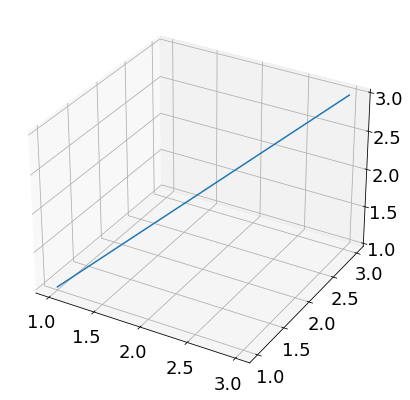

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=[1,2,3]
y=[1,2,3]
z=[1,2,3]
ax.plot(x,y,z)
plt.show()



In [47]:
def kde_estimator(data):
    bandwidth = np.arange(0.01, 2, .1)
    kde = KernelDensity(kernel='gaussian')
    grid = GridSearchCV(kde, {'bandwidth': bandwidth})
    grid.fit(data)
    values=np.linspace(np.min(data), np.max(data), 100, shape=(len(data),1))
    kde = grid.best_estimator_
    dens = np.exp(kde.score_samples(values))
    return values, dens
    

In [44]:
def load_data(name, carpeta,x="TIME", y="CH1", x_new="t",y_new="V"):
    p="homodina/{}".format(carpeta)
    data=pd.read_csv("{}/{}.csv".format(p,name),skiprows=14, usecols=[x, y])
    data.rename(columns={x:x_new,
                        y:y_new}, inplace=True)
    return data

In [45]:
datos=load_data("tek0003CH1","vacio")

In [46]:
v=np.array(datos["V"]).reshape(len(datos["V"]),1)
values, density=kde_estimator(v)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.0368     -0.03593535 -0.03507071 -0.03420606 -0.03334141 -0.03247677
 -0.03161212 -0.03074747 -0.02988283 -0.02901818 -0.02815354 -0.02728889
 -0.02642424 -0.0255596  -0.02469495 -0.0238303  -0.02296566 -0.02210101
 -0.02123636 -0.02037172 -0.01950707 -0.01864242 -0.01777778 -0.01691313
 -0.01604848 -0.01518384 -0.01431919 -0.01345455 -0.0125899  -0.01172525
 -0.01086061 -0.00999596 -0.00913131 -0.00826667 -0.00740202 -0.00653737
 -0.00567273 -0.00480808 -0.00394343 -0.00307879 -0.00221414 -0.00134949
 -0.00048485  0.0003798   0.00124444  0.00210909  0.00297374  0.00383838
  0.00470303  0.00556768  0.00643232  0.00729697  0.00816162  0.00902626
  0.00989091  0.01075556  0.0116202   0.01248485  0.01334949  0.01421414
  0.01507879  0.01594343  0.01680808  0.01767273  0.01853737  0.01940202
  0.02026667  0.02113131  0.02199596  0.02286061  0.02372525  0.0245899
  0.02545455  0.02631919  0.02718384  0.02804848  0.02891313  0.02977778
  0.03064242  0.03150707  0.03237172  0.03323636  0.03410101  0.03496566
  0.0358303   0.03669495  0.0375596   0.03842424  0.03928889  0.04015354
  0.04101818  0.04188283  0.04274747  0.04361212  0.04447677  0.04534141
  0.04620606  0.04707071  0.04793535  0.0488    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.